In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os

In [44]:
model_path = "ckpts/sft_triviaqa_llama7B_full_normalized/checkpoint_10000/hf_model/"
likelihoods_25000 = np.e**np.load(os.path.join(model_path, "trainpts_answer_log_probs_mean_all2.npy"))

In [47]:
len(likelihoods_25000)

17944

In [90]:
base_model_likelihood = np.e**np.load("triviaqa_trainpts_base_model_answer_log_probs_mean_all2_spacing2.npy")
base_model_likelihood_orig = np.e**np.load("triviaqa_trainpts_base_model_answer_log_probs_mean_all2.npy")

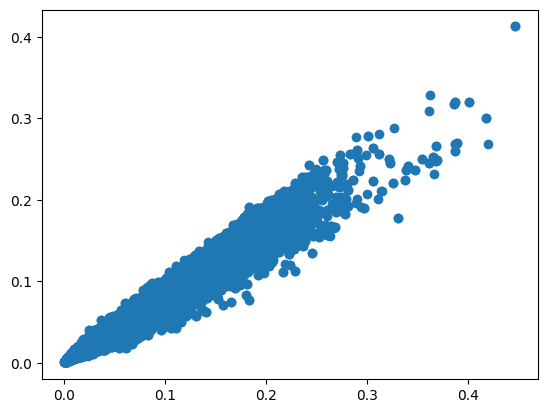

In [91]:
plt.scatter(base_model_likelihood, base_model_likelihood_orig)

In [74]:
model_path = "ckpts/sft_triviaqa_llama7B_full_normalized/checkpoint_02000/hf_model/"
likelihoods_01000 = np.e**np.load(os.path.join(model_path, "trainpts_answer_log_probs_mean_all2.npy")) 

In [75]:
len(likelihoods_01000)

138384

Text(0.5, 1.0, 'TriviaQA')

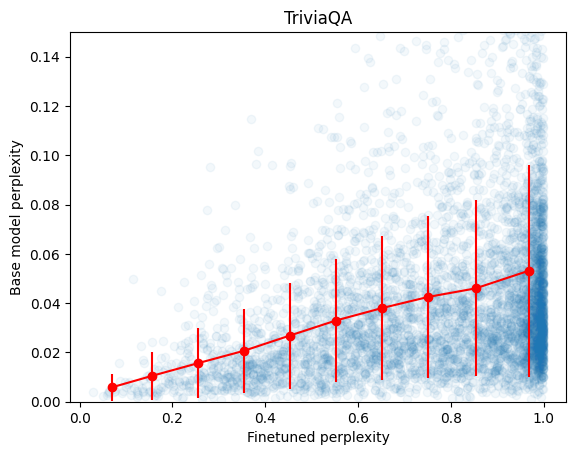

In [88]:
rand_subsample_idxs = np.random.choice(len(likelihoods_25000), 5000, replace=False)

plt.scatter(likelihoods_01000[rand_subsample_idxs], base_model_likelihood[rand_subsample_idxs], alpha=0.05)

bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

x_means = []
means = []
stds = []

for i in range(len(bins)-1):
    idx = np.where((likelihoods_01000 >= bins[i]) & (likelihoods_01000 < bins[i+1]))[0]
    x_means.append(np.mean(likelihoods_01000[idx]))
    means.append(np.mean(base_model_likelihood[idx]))
    stds.append(np.std(base_model_likelihood[idx]))

plt.errorbar(x_means, means, yerr=stds, fmt='o-', color='red')
plt.ylim(0, 0.15)

plt.xlabel("Finetuned perplexity")
plt.ylabel("Base model perplexity")
plt.title("TriviaQA")

In [8]:
num_correct = (np.load("llama7B_triviaqa_train_answer_types_all12.npy")==0).sum(axis=-1)

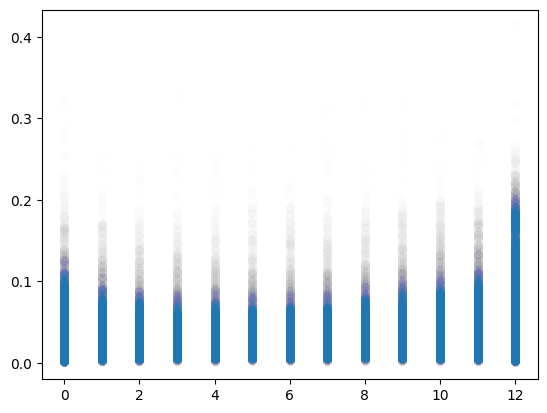

In [41]:
plt.scatter(num_correct, base_model_likelihood, alpha=0.005, label="2000")

In [34]:
(num_correct>6).sum()/len(num_correct)

0.5779931205919759

Text(0.5, 1.0, 'TriviaQA')

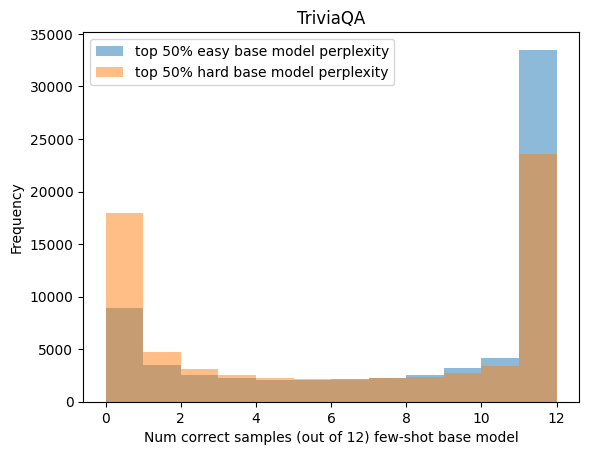

In [43]:
threshold = np.percentile(base_model_likelihood, 50)
easy_idxs = np.where(base_model_likelihood>threshold)
hard_idxs = np.where(base_model_likelihood<=threshold)

plt.hist(num_correct[easy_idxs], bins=12, alpha=0.5, label="top 50% easy base model perplexity")
plt.hist(num_correct[hard_idxs], bins=12, alpha=0.5, label="top 50% hard base model perplexity")
plt.xlabel("Num correct samples (out of 12) few-shot base model")
plt.legend()
plt.ylabel("Frequency")
plt.title("TriviaQA")

In [101]:
checkpoints = ["00500","02000", "04000", "06000", "08000" ,"10000"]
# checkpoints = ["02000","08000",]

base_model_likelihood = np.e**np.load("triviaqa_trainpts_base_model_answer_log_probs_mean_all2.npy")
likelihoods_all = [base_model_likelihood]
for checkpoint in checkpoints:
    path = "ckpts/sft_triviaqa_llama7B_full_normalized/checkpoint_{}/hf_model/".format(checkpoint)
    print(path)
    likelihoods = np.e**np.load(os.path.join(path, "trainpts_answer_log_probs_mean_all2.npy"))
    likelihoods_all.append(likelihoods)

ckpts/sft_triviaqa_llama7B_full_normalized/checkpoint_00500/hf_model/
ckpts/sft_triviaqa_llama7B_full_normalized/checkpoint_02000/hf_model/
ckpts/sft_triviaqa_llama7B_full_normalized/checkpoint_04000/hf_model/
ckpts/sft_triviaqa_llama7B_full_normalized/checkpoint_06000/hf_model/
ckpts/sft_triviaqa_llama7B_full_normalized/checkpoint_08000/hf_model/
ckpts/sft_triviaqa_llama7B_full_normalized/checkpoint_10000/hf_model/


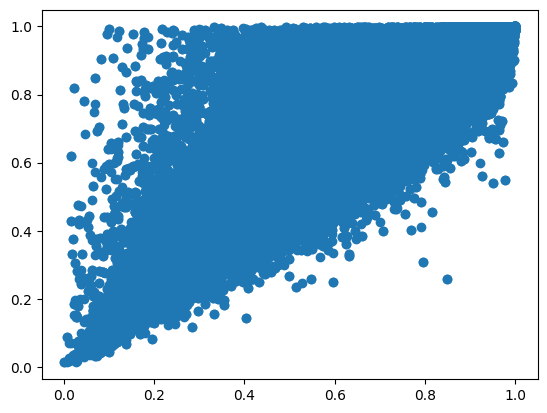

In [102]:
plt.scatter(likelihoods_all[1], likelihoods_all[-1])

In [93]:
base_model_likelihood.shape

(138384,)

In [94]:
likelihoods.shape

(138384,)

In [103]:
likelihoods_all = np.array(likelihoods_all)

In [104]:
likelihoods_all.shape

(7, 138384)

Text(0.5, 1.0, 'TriviaQA')

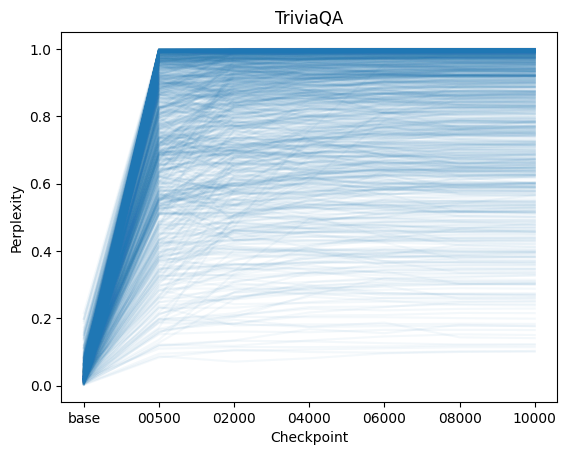

In [108]:
random_idxs = np.random.choice(len(likelihoods_all[0]), 1000, replace=False)
for i in range(len(random_idxs)):
    plt.plot(likelihoods_all[:, random_idxs[i]], alpha=0.05, color = 'C0')

plt.xticks(range(len(checkpoints)+1), ["base"]+checkpoints)

plt.xlabel("Checkpoint")
plt.ylabel("Perplexity")
plt.title("TriviaQA")